<a href="https://colab.research.google.com/github/smlrkh1107/Python3/blob/astronomy/%EC%B2%9C%EB%AC%B8%EC%9A%B0%EC%A3%BC_Lecture3(Thinking_with_a_different_way).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Lecture 3]

In [22]:
!ls

02_display.py					   fitsfile.py
aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits  HorseHead.fits
aia.lev1_171_2013-05-01T03_30_00Z_image_lev1.fits  __pycache__
fitsfile_Lecture03.py				   sample_data


In [0]:
!rm sdoaia171.pickle

##00. File Upload

In [0]:
#gits에 코드 오지게떠서 일단 주석처리!
#코랩에 내 컴퓨터에 있는 파일 업로드 !! 버튼뜸.
from google.colab import files
files.upload();

In [0]:
#gits에 코드 오지게떠서 일단 주석처리!
#코랩에 내 컴퓨터에 있는 파일 업로드 !! 버튼뜸.
from google.colab import files
files.upload();

In [0]:
#gits에 코드 오지게떠서 일단 주석처리!
#코랩에 내 컴퓨터에 있는 파일 업로드 !! 버튼뜸.
from google.colab import files
files.upload();

##02. Display
* Lecture03에 있는 fitsfile 을 사용해야함!! 

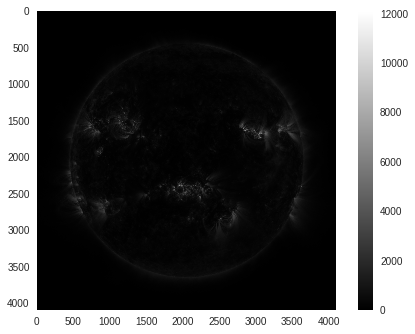

In [5]:
#
# SAMPLE 02. Display SDO.
#

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import fitsfile_Lecture03  ## 3강의의 fitfile

#
# Load a FITS file.
file_path = "aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits"

fits = fitsfile_Lecture03.FitsFile()  ## 3강의의 fitfile
fits.load_file(file_path)

#
# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(fits.data, cmap=cm.gray)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()



##03.  Log Scale
* 포토샵할 때 명도를 조절하면 빛이 잘보이듯이 로그함수를 이용하여 색을 조절함(맞나?)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


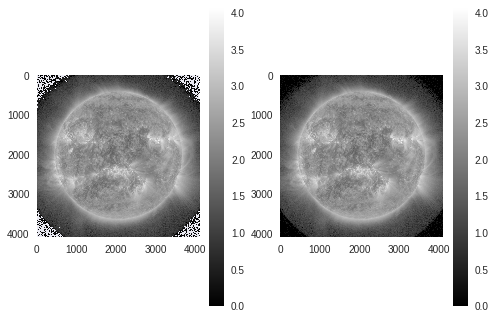

In [8]:
import numpy as np


fits = fitsfile_Lecture03.FitsFile()  ## 3강의의 fitfile
fits.load_file(file_path)


#clip안했을 때 (1)
log_data1 = np.log10(fits.data)

#clip 했을 때 (2)
log_data2 = np.clip(fits.data, 1.0, None)
log_data2 = np.log10(log_data2)

# Convert data to logscale.


fig = plt.figure()
#(1)
ax1 = fig.add_subplot(1,2,1) 
im1 = ax1.imshow(log_data1, cmap=cm.gray)  #30분 후
plt.grid()
plt.colorbar(im1, ax=ax1)

#(2)
ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(log_data2, cmap=cm.gray)  #00분
plt.grid()
plt.colorbar(im2, ax=ax2)

plt.show()

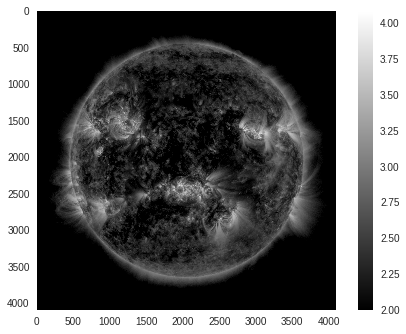

In [10]:
fits = fitsfile_Lecture03.FitsFile()  ## 3강의의 fitfile
fits.load_file(file_path)


fits.data = np.clip(fits.data, 100, None) #숫자 변경
fits.data = np.log10(fits.data)



# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(fits.data, cmap=cm.gray)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()



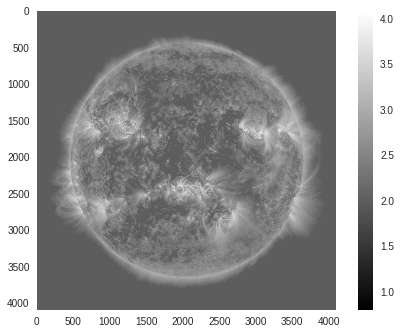

In [27]:
fits = fitsfile_Lecture03.FitsFile()  ## 3강의의 fitfile
fits.load_file(file_path)


fits.data = np.clip(fits.data, 100, None)
fits.data = np.log10(fits.data)



# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(fits.data, cmap=cm.gray, vmin=0.8)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()



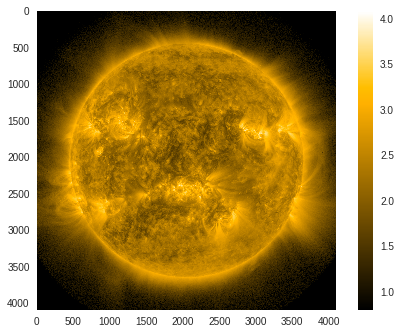

In [26]:
  #
# CODE 03. Display SDO in log scale.
#

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import fitsfile_Lecture03

import pickle
file = open("sdoaia171.pickle", "rb")
sdoaia171 = pickle.load(file)

#
# Load a FITS file.
file_path = "aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits"

fits = fitsfile_Lecture03.FitsFile()  ## 3강의의 fitfile
fits.load_file(file_path)






#
# Convert data to logscale.
fits.data = np.clip(fits.data, 1.0, None)
fits.data = np.log10(fits.data)

min = np.min(fits.data)
max = np.max(fits.data)

#
# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(fits.data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()





##04. 히스토그램

In [0]:
#
# SAMPLE 04. Display histogram.
#

#
# Load a FITS file.
file_path = "aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits"

fits = fitsfile_Lecture03.FitsFile()
fits.load_file(file_path)

#
# Convert data to logscale and compute histograms.

raw_img = fits.data
raw_min = np.min(raw_img)
raw_max = np.max(raw_img)
raw_span = raw_max - raw_min
raw_y, raw_x = np.histogram(raw_img, bins=np.arange(raw_min, raw_max, raw_span/256))

scale_img = np.clip(raw_img, 1.0, None)
scale_img = np.log10(scale_img)
scale_min = np.min(scale_img)
scale_max = np.max(scale_img)
scale_span = scale_max - scale_min
scale_y, scale_x = np.histogram(scale_img, bins=np.arange(scale_min, scale_max, scale_span/256))


#
#
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
im1 = ax1.imshow(raw_img, cmap=cm.gray)
plt.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(2,2,2)
img2 = ax2.bar(raw_x[:-1], raw_y, width=raw_span/256, color="gray")

ax3 = fig.add_subplot(2,2,3)
im3 = ax3.imshow(scale_img, cmap=cm.gray)
plt.colorbar(im3, ax=ax3)

ax4 = fig.add_subplot(2,2,4)
img4 = ax4.bar(scale_x[:-1], scale_y, width=scale_span/256, color="gray")


mng = plt.get_current_fig_manager()
mng.window.showMaximized()
plt.show()

exit()

#
# Display histogram.
plt.bar(x[:-1], y, width=0.005, color="gray", ax=ax2)
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.title('HISTOGRAM')
	
mng = plt.get_current_fig_manager()
mng.window.showMaximized()
plt.show()


#
# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(fits.data, cmap=cm.gray)
plt.colorbar(im, ax=ax)
plt.show()



##05.차이
* 이번엔 Log 함수가 아니라 sigmoid 함수! (보다 명확한 차이를 구별할 수 있게 됨)
* 같은 사물을 시간차로 두 번 찍으면 밝기가 같으면 서로의 차이가 0, 차이가 생기면 값이 생기게 됨.
* 현재 - 과거 : (+)값이 나오면 과거에 비해 밝아졌다. (-)값은 어두워졌다는 의미
### *  **(우)sigmoid 함수 적용** 

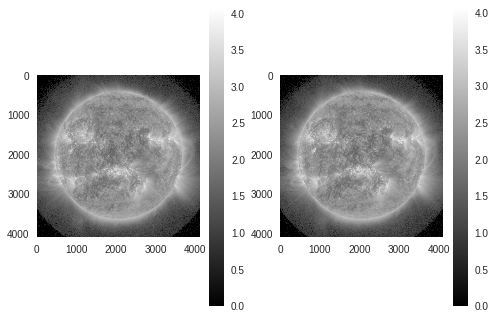

In [29]:
#
# SAMPLE 05. Display SDO in log scale.
#

#import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib.cm as cm

#import fitsfile


#
# Load a FITS file.

fits1 = fitsfile_Lecture03.FitsFile()
fits1.load_file("aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits")
img1 = np.clip(fits1.data, 1.0, None)
img1 = np.log10(img1)

fits2 = fitsfile_Lecture03.FitsFile()
fits2.load_file("aia.lev1_171_2013-05-01T03_30_00Z_image_lev1.fits")
img2 = np.clip(fits2.data, 1.0, None)
img2 = np.log10(img2)

#
# Compute a difference image.
diff = []
sig = []

diff = img2 - img1  #현재 - 과거
diff = np.clip(diff, -1.0, +1.0)

#sig = 1.0 / (1.0 + np.exp(-diff * 6.0))
sig = np.tanh(diff*2.0)

#
# Display the FITS.
fig = plt.figure()



ax1 = fig.add_subplot(1,2,1) 
im1 = ax1.imshow(img2, cmap=cm.gray)  #30분 후
plt.grid()
plt.colorbar(im1, ax=ax1)


ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(img1, cmap=cm.gray)  #00분
plt.grid()
plt.colorbar(im2, ax=ax2)

plt.show()




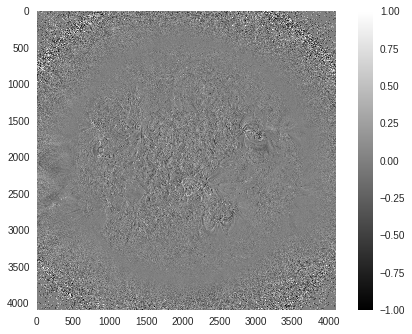

In [30]:
#단순한 빼기연산
fig, ax = plt.subplots()
im3 = plt.imshow(diff, cmap=cm.gray)  #차이 
plt.colorbar(im3)
plt.grid()
plt.show()

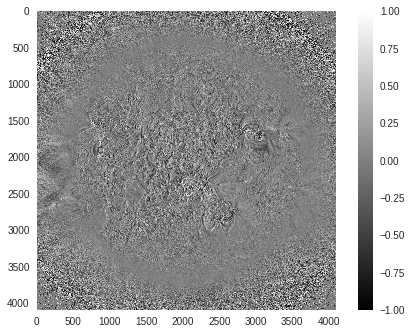

In [31]:
#sig 함수로 보다 선명하게 차이를 구분해줌.

fig, ax = plt.subplots()
im4 = plt.imshow(sig, cmap=cm.gray)  #차이 
plt.colorbar(im3)
plt.grid()
plt.show()

**anaconda로 실행하면 image를 부분적으로 확대하는것이 가능하다. **
![대체 텍스트](https://blogfiles.pstatic.net/MjAxODEyMTFfMjM3/MDAxNTQ0NTA2MDA3MDU4.TGaB6qfiq7eFVk5e0QGHaLHEiFH_p8eXZLzRTpjPoXQg.u5APjgM4Xx5-BfAQurodRD7zBVzYsq7EHlRp0q1GYuQg.PNG.smlrkh1107/%EC%BA%A1%EC%B2%98.PNG)

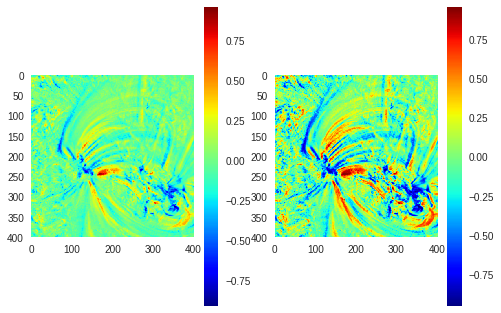

In [48]:

#
# Crop image on the disk.
roi_diff = diff[1400:1800, 2700:3100]
roi_sig = sig[1400:1800, 2700:3100]

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(roi_diff, cmap=cm.jet)
plt.colorbar(im1, ax=ax1)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(roi_sig, cmap=cm.jet)
plt.colorbar(im2, ax=ax2)
plt.grid()

plt.show()


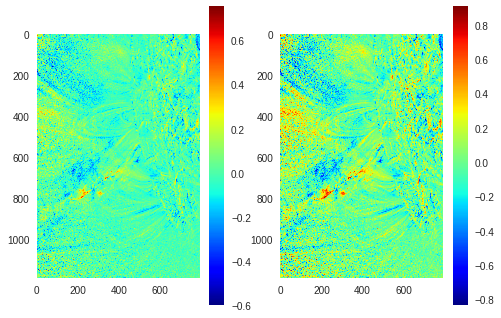

In [49]:
#
# Crop image at the edge.
roi_diff = diff[1880:3069, 0:790]
roi_sig = sig[1880:3069, 0:790]

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(roi_diff, cmap=cm.jet)
plt.colorbar(im1, ax=ax1)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(roi_sig, cmap=cm.jet)
plt.colorbar(im2, ax=ax2)
plt.grid()

plt.show()


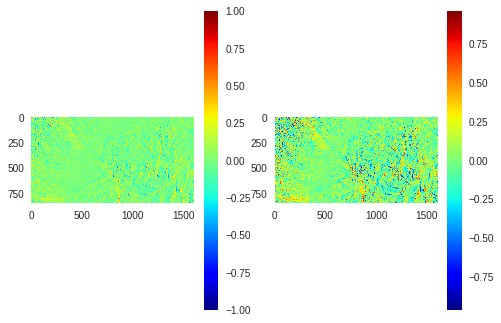

In [55]:
#
# Crop image at the edge.
roi_diff = diff[1000:1850, 0:1600]
roi_sig = sig[1000:1850, 0:1600]

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(roi_diff, cmap=cm.jet)
plt.colorbar(im1, ax=ax1)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(roi_sig, cmap=cm.jet)
plt.colorbar(im2, ax=ax2)
plt.grid()

plt.show()


![대체 텍스트](https://blogfiles.pstatic.net/MjAxODEyMTFfMTAz/MDAxNTQ0NTA3OTM1ODgx.7L7jLgYQ6KHDQVscpEoppr1Ku0fMsVyTBTzHbTaKmVgg.quiavXWNzxaEbkcarkiRrfQUQf7pH5Y5OTr-_jTT_OEg.PNG.smlrkh1107/2.PNG
)

##06. coodinate

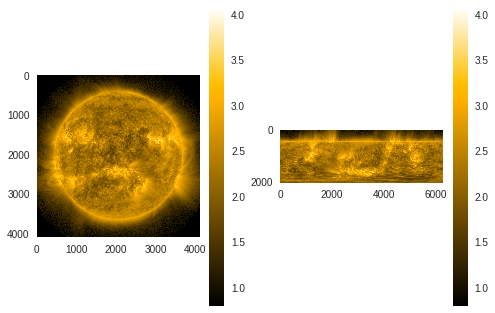

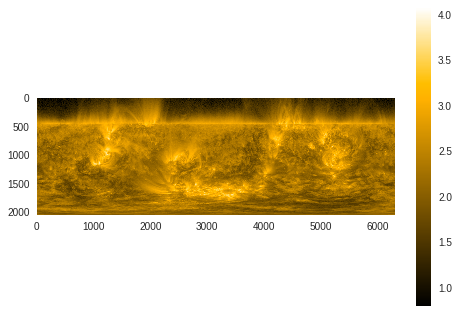

In [47]:
#
# SAMPLE  03. Convert coordinates.
#


import math
import pickle
file = open("sdoaia171.pickle", "rb")
sdoaia171 = pickle.load(file)

#
# Load a FITS file.
fits = fitsfile_Lecture03.FitsFile()
fits.load_file(file_path)

file_path = "aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits"


#
# Convert data to logscale.
fits.data = np.clip(fits.data, 1.0, None)
fits.data = np.log10(fits.data)

#
# Create a new data.
(h, w) = fits.data.shape
w = int(2 * 3.14 * 1000) # 360 degree in radian  / pi=3.14 = 180degree  / 1도를 1000으로 나눔. x축이 넘 좁아져서
h = int(h / 2)

new_data = np.empty((h, w), fits.data.dtype)

#
# Convert coordinates.
for y in range(h):		# distance from the center
	for x in range(w):	# degree
		ox = int(h + math.sin(x/1000.0) * y)
		oy = int(h - math.cos(x/1000.0) * y)

		new_data[h-y-1, x] = fits.data[oy, ox]

#
# Display the FITS and the new data.
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(fits.data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im1, ax=ax1)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(new_data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im2, ax=ax2)
plt.grid()

plt.show()

#
# Display the new data.
fig, ax = plt.subplots()
im = plt.imshow(new_data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im, ax=ax)
plt.grid()
plt.show()



In [41]:
#
# SAMPLE  03. Convert coordinates.
#


import math
import pickle

file = open("sdoaia171.pickle", "rb")
sdoaia171 = pickle.load(file)


#
# Load a FITS file.
file_path = "aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits"

fits = fitsfile_Lecture03.FitsFile()
fits.load_file(file_path)

#
# Convert data to logscale.
fits.data = np.clip(fits.data, 1.0, None)
fits.data = np.log10(fits.data)

#
# Create a new data.
(h, w) = fits.data.shape
w = int(2 * 3.14 * 1000) # 360 degree in radian  / pi=3.14 = 180degree  / 1도를 1000으로 나눔. x축이 넘 좁아져서
h = int(h / 2 * np.sqrt(2))

new_data = np.empty((h, w), fits.data.dtype)

#
# Convert coordinates.
for y in range(h):		# distance from the center
	for x in range(w):	# degree
		ox = int(h + math.sin(x/1000.0) * y)
		oy = int(h - math.cos(x/1000.0) * y)
    
     if (ox>=4096 or oy>=4096)  :
        new+data[h-y-1,x] = 0
    else :
      new_data[h-y-1, x] = fits.data[oy, ox]

#
# Display the FITS and the new data.
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(fits.data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(new_data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im2, ax=ax2)

plt.show()

#
# Display the new data.
fig, ax = plt.subplots()
im = plt.imshow(new_data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im, ax=ax)
plt.show()



IndentationError: ignored